In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder as TE

import os
import datetime
from decimal import Decimal

mp.style.use('fivethirtyeight')

In [2]:
def read_data(old_csvs, new_csv):
    if os.path.exists(new_csv):
        df = pd.read_csv(new_csv)
        return df
    else:
        dfs = []
        for csv in old_csvs:
            dfs.append(pd.read_csv(csv))
        return dfs

def write_csv(new_csv, new_df):
    new_df.to_csv(new_csv)

In [3]:
p1 = "Clean_Dataset.csv"
p2 = "business.csv"
p3 = "economy.csv"

new_csv = "My_Clean_Dataset.csv"

old_csvs = [p1, p2, p3]
# cd_df, buss_df, eco_df = read_data(old_csvs, new_csv)

clean_created_df = read_data(old_csvs, new_csv)

In [65]:
write_csv(new_csv, clean_created_df)

In [2]:
cd_df = pd.read_csv("Clean_Dataset.csv")
cd_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
buss_df = pd.read_csv("business.csv")
buss_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
eco_df = pd.read_csv("economy.csv")
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


* Airline encoding  &rarr; Target Encoding
* Combining codes and encoding
* Location stats 
    * Unique locs
    * Total arrivals and departures
    * Mean price to each and from loc
    * Flight distribution based on locs
* Departure time and arrival time encoding
* Number of stops based on to and from locs (if feasible)
* Number of stops based on airline type
* Price distributions based on airlines, to and from locs, arrival and departure time encoding
* Time taken based on airlines, to and from locs
* Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding
* Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible)

In [5]:
eco_df['airline'].value_counts()

Vistara      67270
Air India    47996
Indigo       43120
GO FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: airline, dtype: int64

In [6]:
buss_df['airline'].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

In [7]:
buss_df["class"] = 1
eco_df["class"] = 0

In [8]:
clean_created_df = pd.concat([eco_df, buss_df], axis=0)
print(clean_created_df.shape)
clean_created_df.head()

(300261, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",0


In [11]:
clean_created_df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [49]:
def pie_box_plot(column, title, explode = False, startangle=0):
    fig, ax = mp.subplots(2, 1, figsize=(15, 15))
    fig.suptitle(title, fontsize=20, fontweight='bold')
    mp.tight_layout()

    # Top ax
    labels = clean_created_df[column].value_counts().index.tolist()
    # explode = (0, 0, 0, 0, 0, 0.3)
    if explode == False:
        ax[0].pie(clean_created_df[column].value_counts(), autopct='%1.2f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, startangle=startangle)
    else:
        ax[0].pie(clean_created_df[column].value_counts(), autopct='%1.2f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode, startangle=startangle)
    ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
    
    # Bottom ax
    sns.boxplot(x=column, y='price', data=clean_created_df, ax=ax[1])
    
    mp.show()

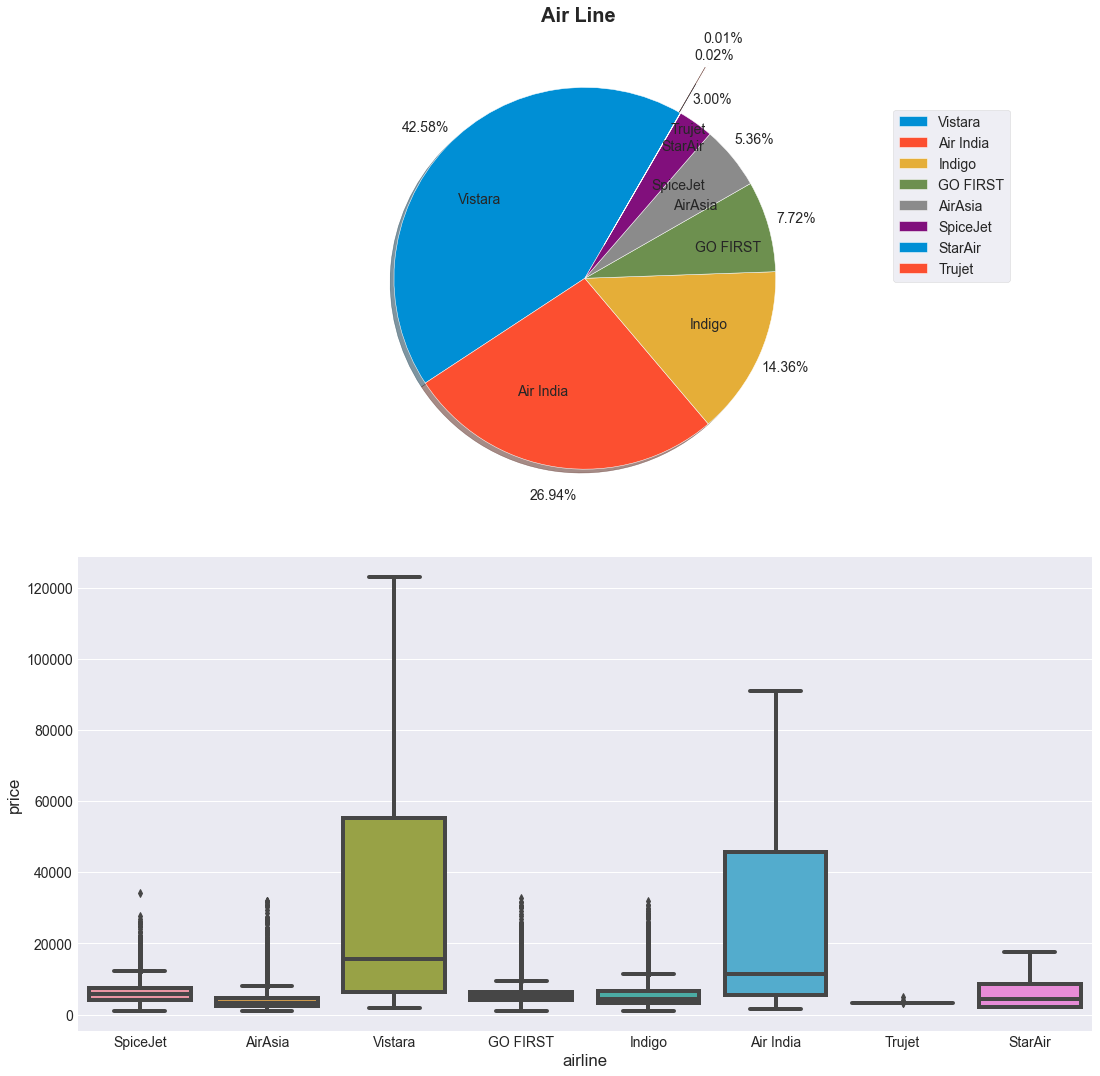

In [50]:
pie_box_plot('airline', 'Air Line', (0, 0, 0, 0, 0, 0, 0.2, 0.3), 60)

In [9]:
clean_created_df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [10]:
clean_created_df.describe()

,num_code,class
count,300261.000000,300261.000000
mean,1417.771709,0.311352
std,1974.514439,0.463047
min,101.000000,0.000000
25%,637.000000,0.000000
50%,818.000000,0.000000
75%,927.000000,1.000000
max,9991.000000,1.000000


In [11]:
clean_created_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 29.8+ MB


[AV - Categorical Data Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

[Medium - Too many Categories](https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6)

In [12]:
clean_created_df["price"] = clean_created_df["price"].str.replace(',', '').astype('int')

In [13]:
encoder = TE(cols='airline')
encoded_airlines = encoder.fit_transform(clean_created_df['airline'], clean_created_df['price'])
encoded_airlines

,airline
0,6179.278881
1,6179.278881
2,4091.072742
3,30396.536302
4,30396.536302
...,...
93482,30396.536302
93483,30396.536302
93484,30396.536302
93485,30396.536302


In [15]:
clean_created_df['flight'] = clean_created_df['ch_code'] + '-' + clean_created_df['num_code'].astype('str')
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963


* Airline encoding  &rarr; Target Encoding ✅
* Combining codes and encoding ✅
* Location stats 
    * Unique locs ✅
    * Total arrivals and departures ✅
    * Mean price to each and from loc &rarr; groupby and min,avg, max price ✅
    * Flight distribution based on locs &rarr; grid of graphs for to and from vs filght company ✅ - add annotations over bars
* Departure time and arrival time encoding ✅
* Number of stops based on to and from locs (if feasible) ✅
* Number of stops based on airline type ✅ - Fill in the missing values and add annotations over bars
* Price distributions based on airlines, to and from locs, arrival and departure time encoding - ✅
* Time taken based on airlines, to and from locs -✅
* Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding -✅
* Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible) - ✅
* Think what more can be done - ✅
* If cannot think of anything visit kaggle, download notebooks and learn more, implement more. - ✅
* Add analysis information for current level of analysis
* ML
* Refactor the code
* Add analysis information for remaning notebook
* Submission

In [16]:
clean_created_df[['from', 'to']].value_counts()

from       to       
Delhi      Mumbai       15291
Mumbai     Delhi        14809
Delhi      Bangalore    14012
Bangalore  Delhi        13756
           Mumbai       12940
Mumbai     Bangalore    12885
           Kolkata      12602
Delhi      Kolkata      11934
Kolkata    Mumbai       11467
Delhi      Chennai      10780
Kolkata    Delhi        10506
Mumbai     Hyderabad    10477
           Chennai      10130
Hyderabad  Mumbai       10073
Bangalore  Kolkata      10029
Kolkata    Bangalore     9824
Chennai    Delhi         9783
           Mumbai        9338
Delhi      Hyderabad     9328
Bangalore  Hyderabad     8971
Hyderabad  Delhi         8507
           Kolkata       7987
           Bangalore     7898
Kolkata    Hyderabad     7897
Chennai    Kolkata       6983
Kolkata    Chennai       6653
Chennai    Bangalore     6493
Bangalore  Chennai       6410
Hyderabad  Chennai       6395
Chennai    Hyderabad     6103
dtype: int64

In [17]:
clean_created_df['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

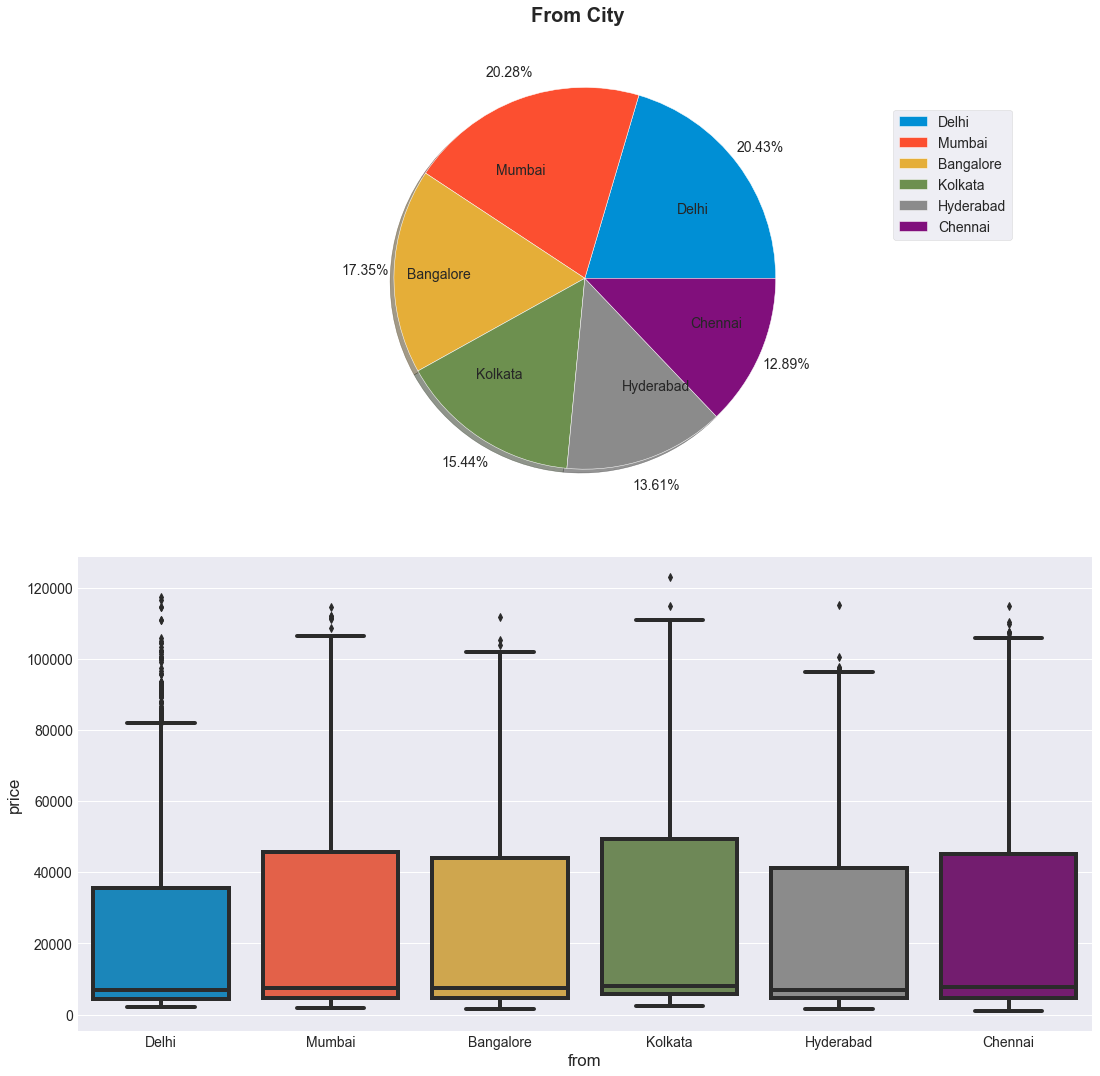

In [51]:
pie_box_plot('from', 'From City')

In [18]:
clean_created_df['to'].value_counts()

Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64

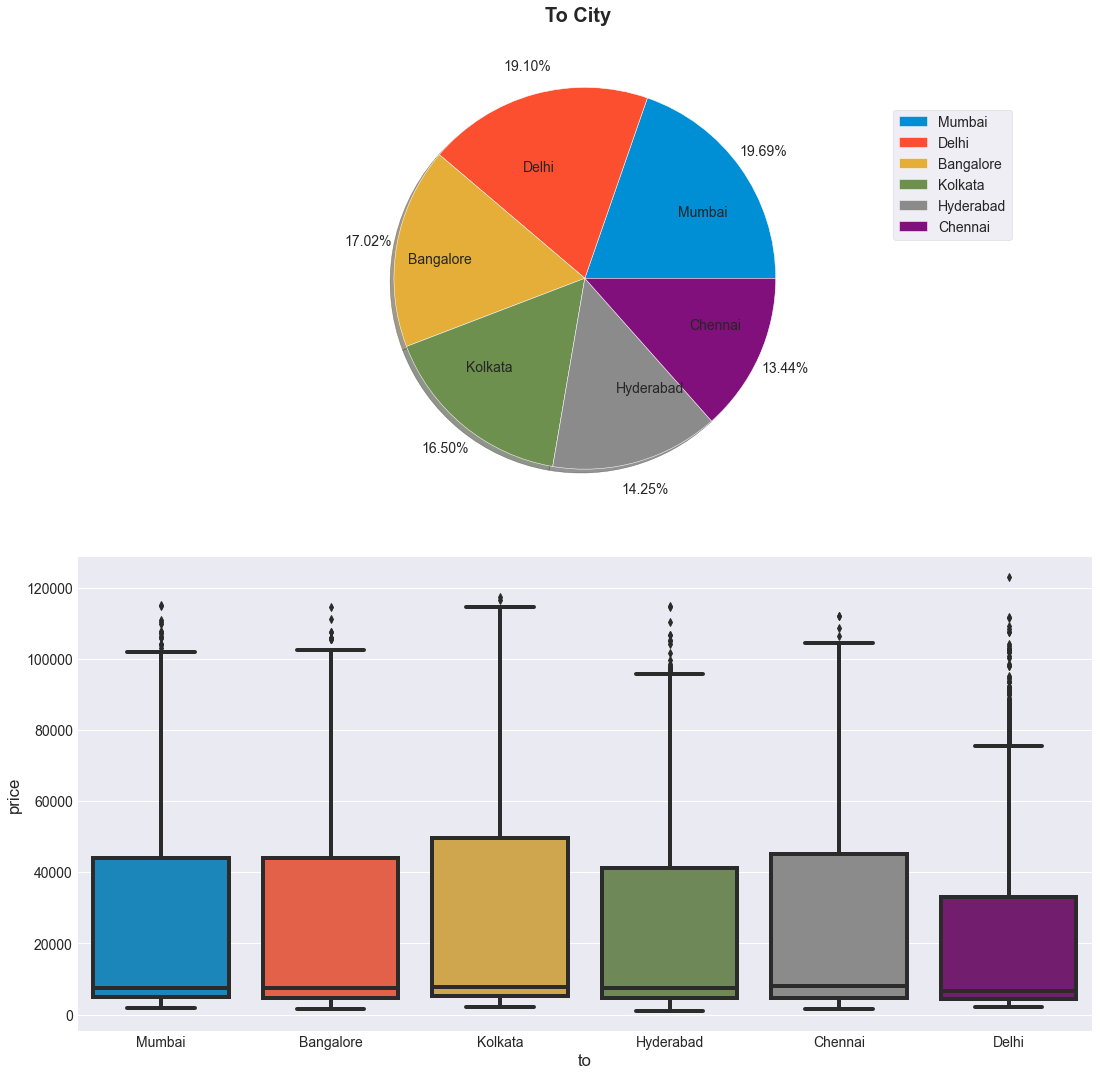

In [52]:
pie_box_plot('to', 'To City')

In [21]:
clean_created_df.groupby(['from', 'to']).agg(
    Mean=('price', np.mean),
    Max = ('price', np.max),
    Min = ('price', np.min)).round(2)

# .mean()['price']

Mean     Max   Min
from      to                               
Bangalore Chennai    23321.85   90720  1603
          Delhi      17723.31  111883  2723
          Hyderabad  21152.05   83239  1694
          Kolkata    23498.23  105168  3026
          Mumbai     23127.23  103819  2150
Chennai   Bangalore  25081.85  107597  1443
          Delhi      18981.86  103683  2051
          Hyderabad  21591.35   92752  1105
          Kolkata    22669.93  104624  2359
          Mumbai     22765.85  114704  1830
Delhi     Bangalore  17880.22   85353  3090
          Chennai    19369.88  104466  1998
          Hyderabad  17347.29  114507  2022
          Kolkata    20566.41  117307  2480
          Mumbai     19354.41   95657  2281
Hyderabad Bangalore  21245.95   97767  1755
          Chennai    21848.07   95208  1543
          Delhi      17242.64   86203  2200
          Kolkata    20823.89   97381  2056
          Mumbai     20065.72  115211  2250
Kolkata   Bangalore  22744.81  105638  3465
          Chennai    23660.36   95183  2966
          Delhi      19422.35  123071  2994
          Hyderabad  21500.01  114705  2436
          Mumbai     22078.88  110936  3379
Mumbai    Bangalore  23147.87  114523  2074
          Chennai    22781.90  111964  1890
          Delhi      18725.32  111437  2336
          Hyderabad  20992.13   99677  2105
          Kolkata    22379.15  100909  2835

In [22]:
clean_ariline_group = clean_created_df.groupby(['from', 'to', 'airline']).count()['ch_code']

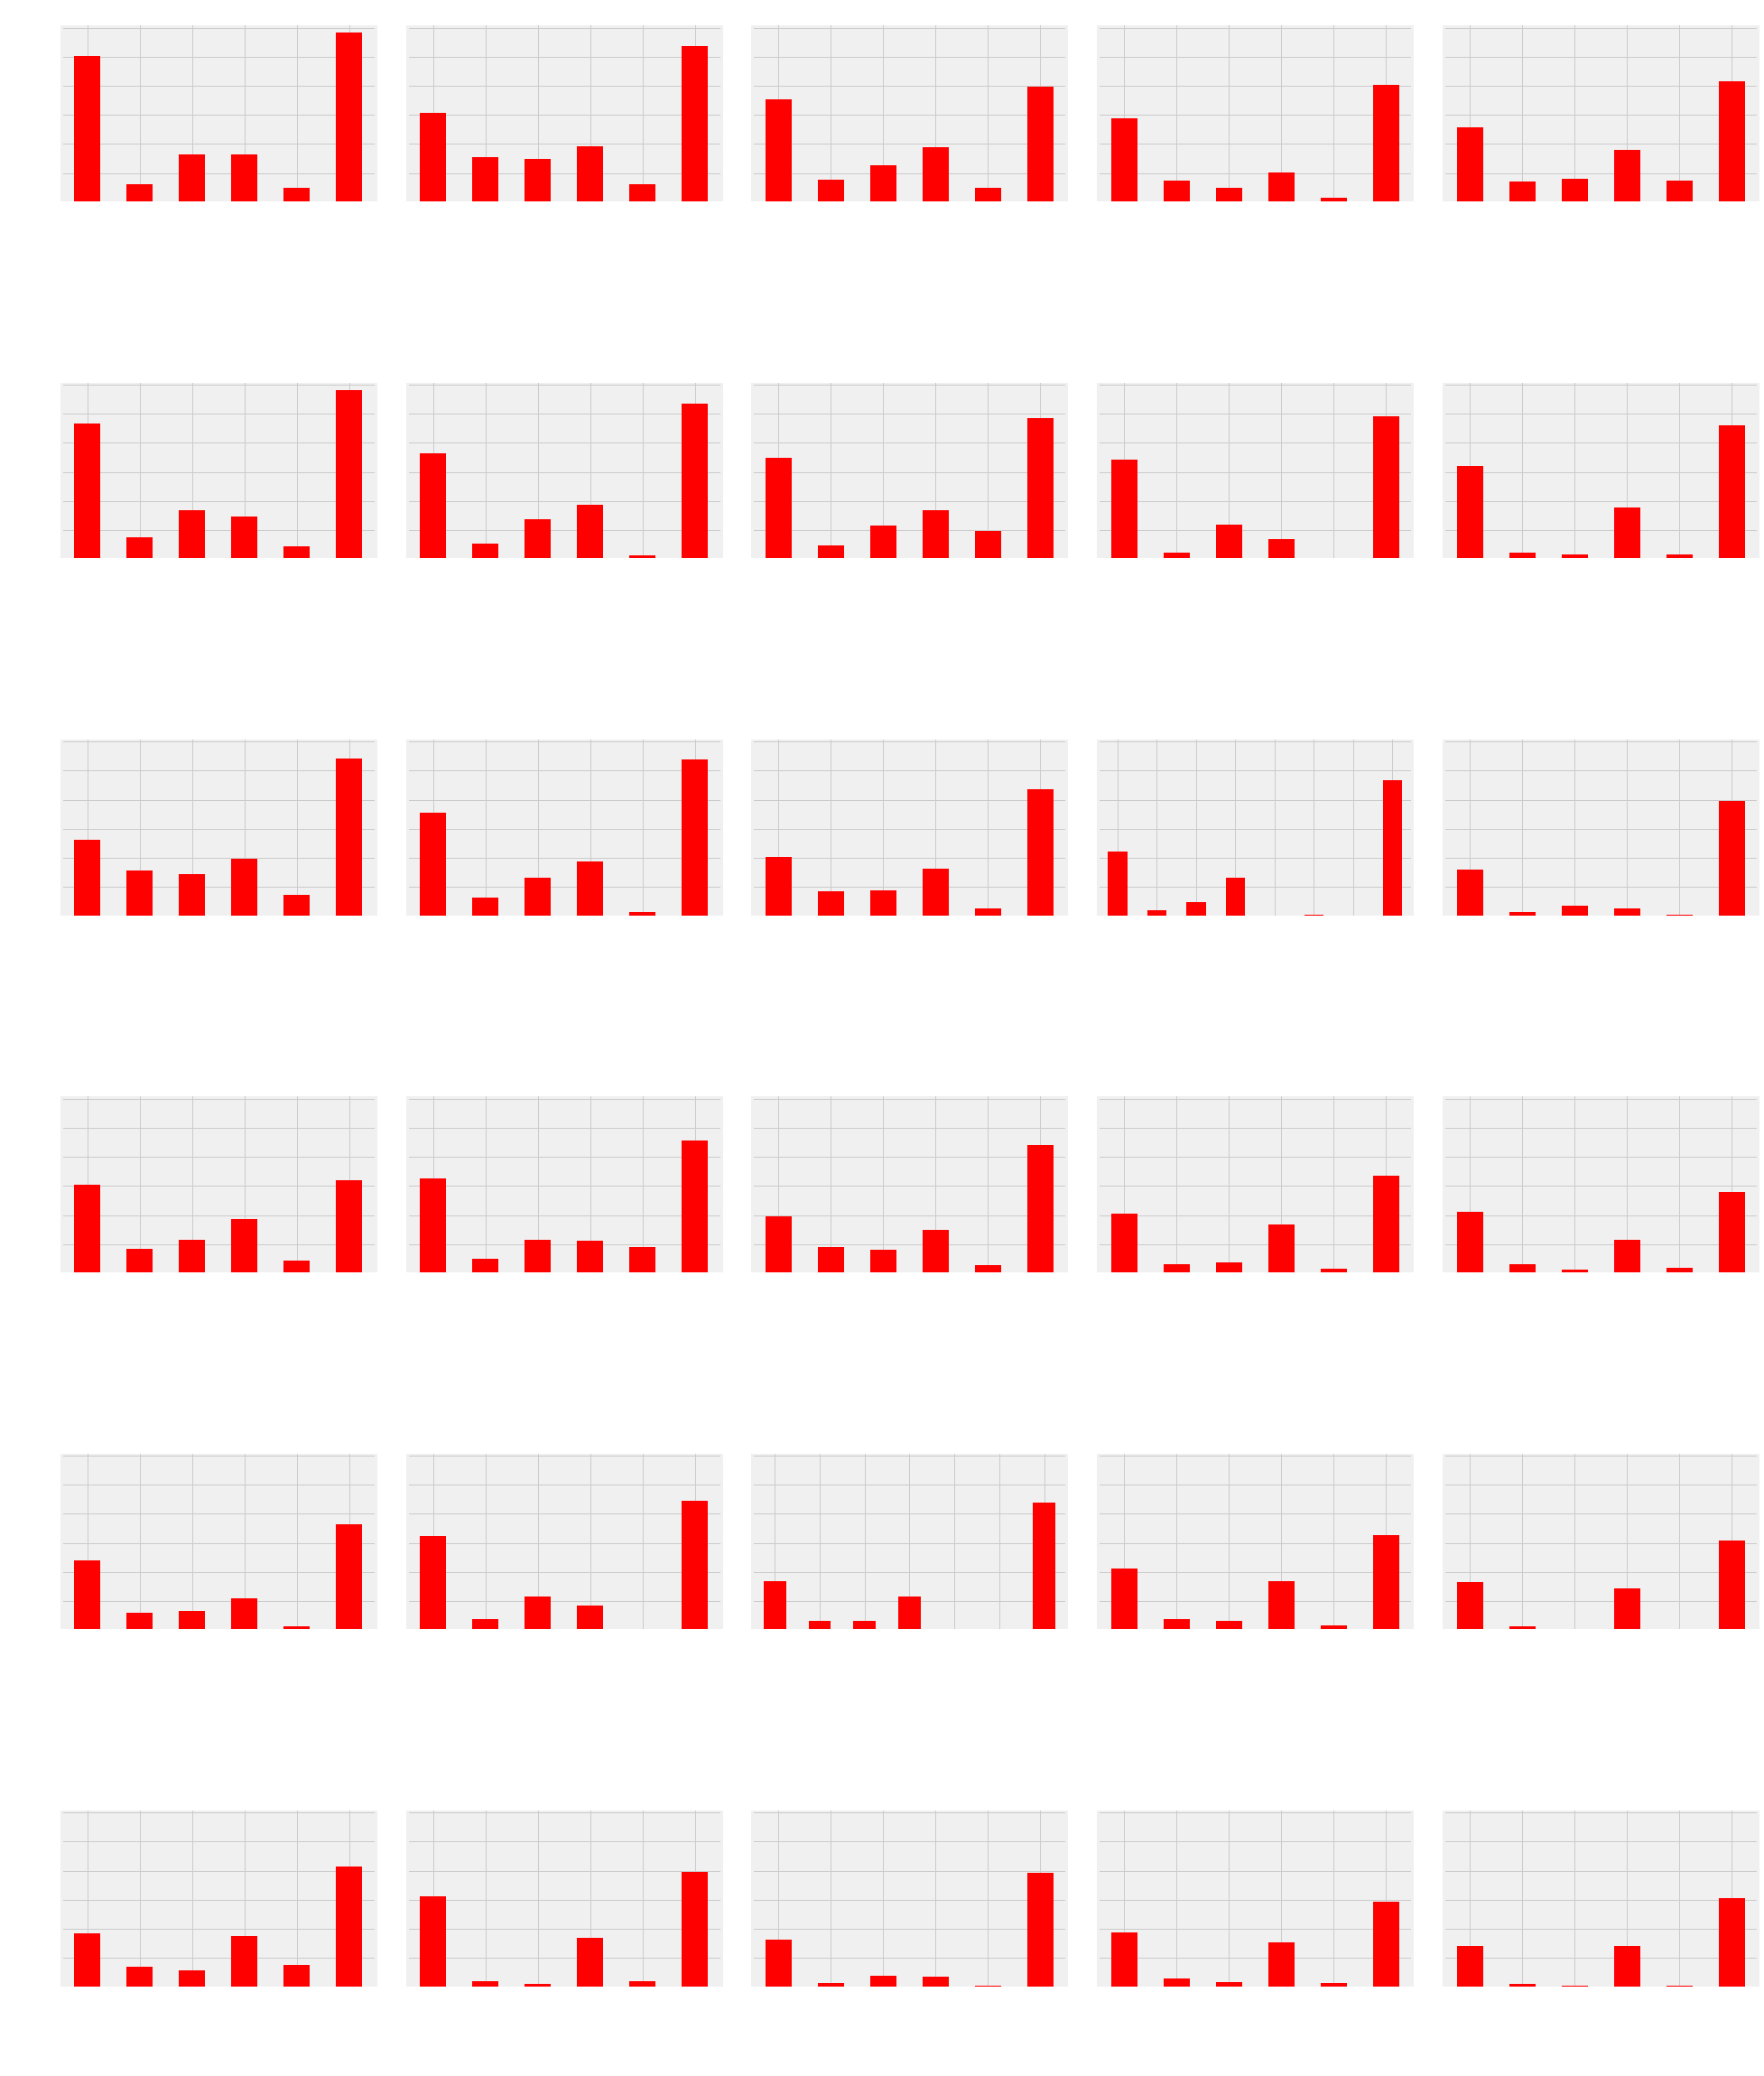

In [41]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 14}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(30, 40), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=1)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue
        ax = axes[a_row][a_col]
        clean_ariline_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=18)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=18)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1
    a_row += 1
    a_col = 0


## Departure time and arrival time encoding

* 4 - 7 : Early Morning
* 7 - 12: Morning
* 12 - 16:Afternoon
* 16 - 20 : Evening
* 20 - 0: Night
* 12 -2 : Late Night
* 2 - 4 : UnGodly Hour

In [27]:
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963


In [28]:
def time_encoding(hr):
    if 0 < hr <= 2:
        return "Late Night"
    elif 2 < hr <= 4:
        return "Ungodly Hour"
    elif 4 < hr <= 7:
        return "Early Morning"
    elif 7 < hr <= 12:
        return "Morning"
    elif 12 < hr <= 16:
        return "Afternoon"
    elif 16 < hr <= 19:
        return "Evening"
    elif 19 < hr <= 23:
        return "Night"

In [53]:
clean_created_df['dep_time_time'] = pd.to_datetime(clean_created_df['dep_time'], format='%H:%M')
clean_created_df['arr_time_time'] = pd.to_datetime(clean_created_df['arr_time'], format='%H:%M')

clean_created_df["dep_time_enc"] = clean_created_df["dep_time_time"].dt.hour.apply(time_encoding)
clean_created_df["arr_time_enc"] = clean_created_df["arr_time_time"].dt.hour.apply(time_encoding)

clean_created_df.drop(columns=["dep_time_time", "arr_time_time"], inplace=True)

clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning


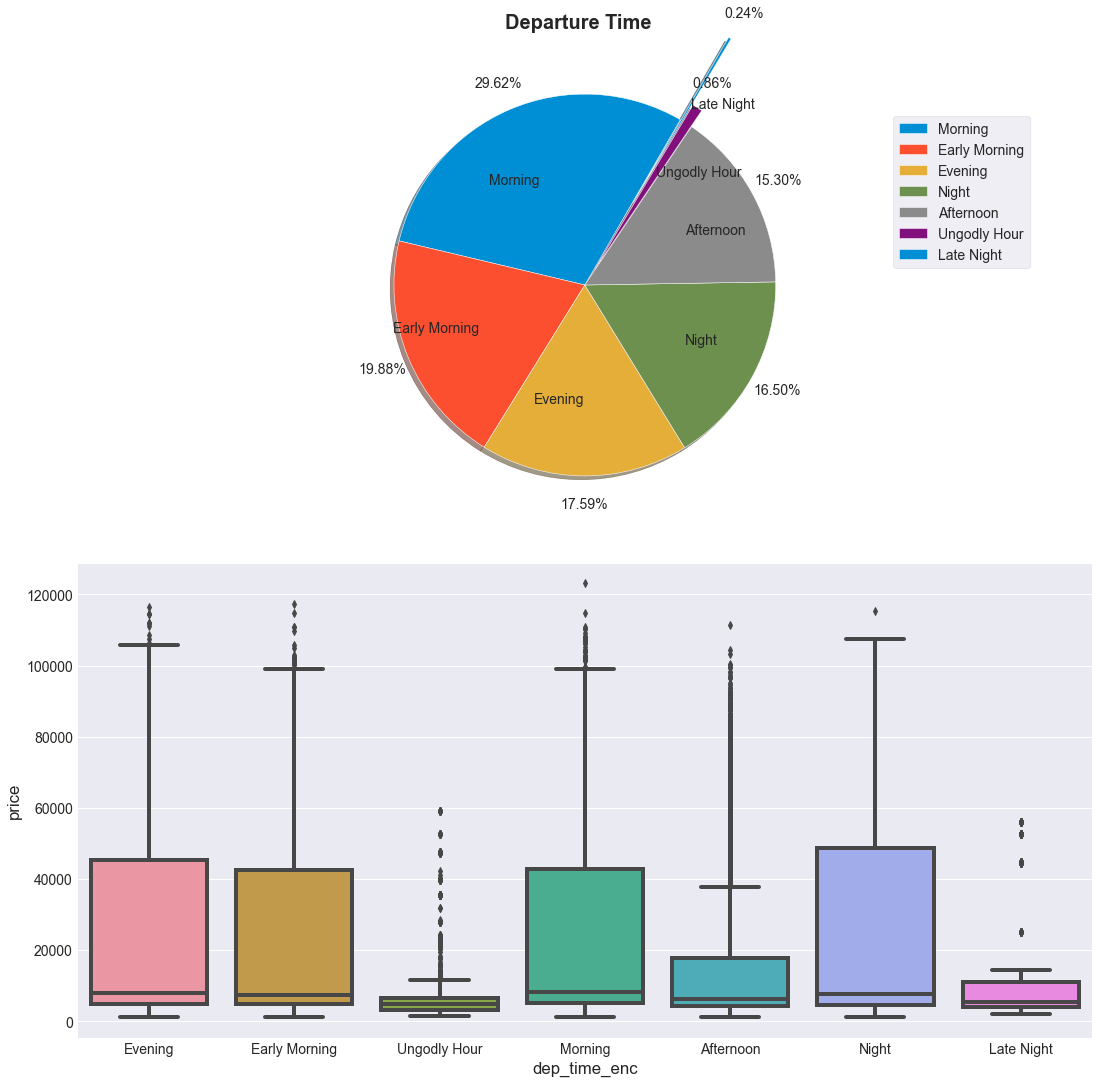

In [58]:
pie_box_plot('dep_time_enc', 'Departure Time',(0,0,0,0,0,0.1,0.5), 60)

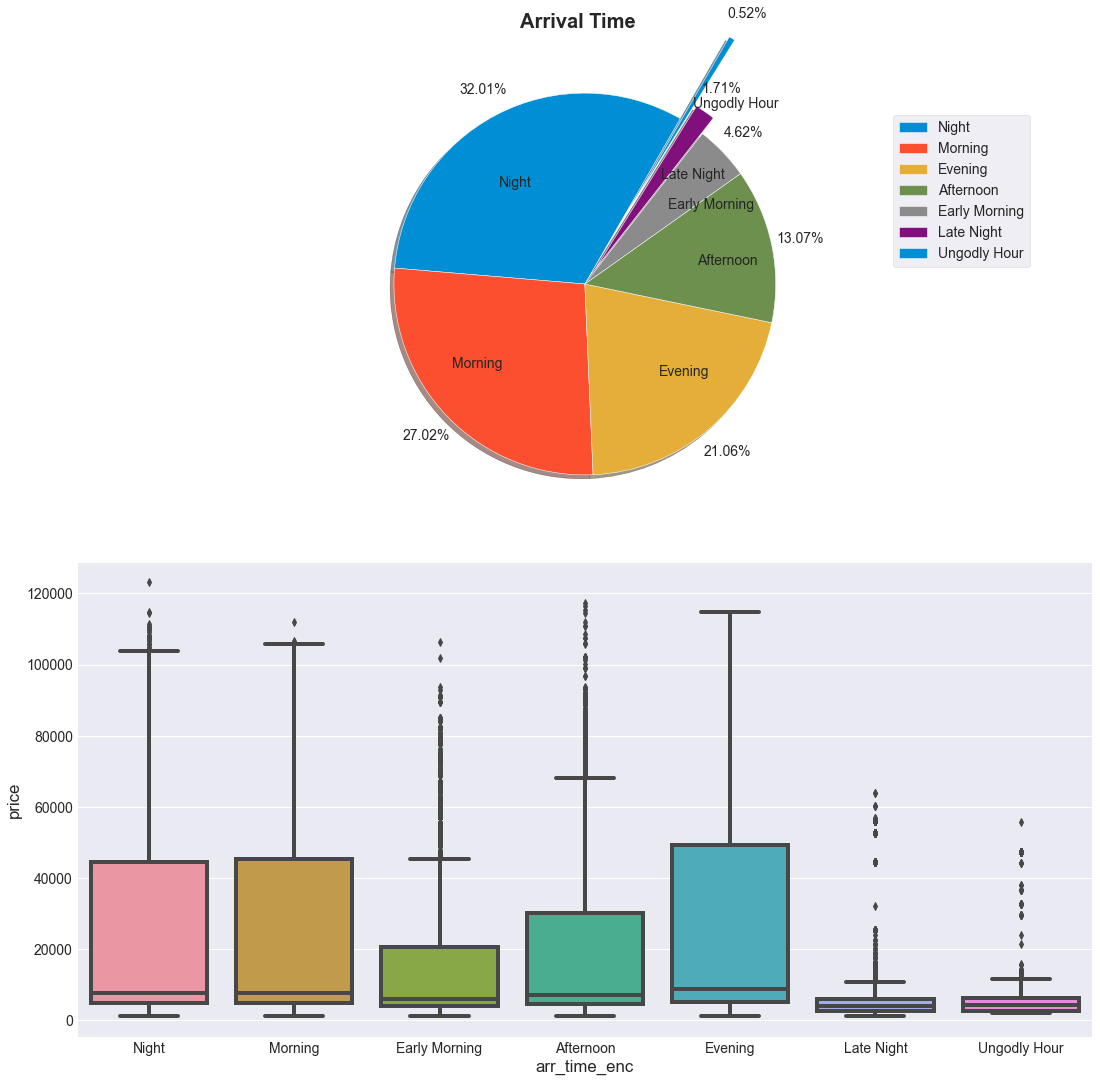

In [61]:
pie_box_plot('arr_time_enc', 'Arrival Time',(0,0,0,0,0,0.1,0.5), 60)

Number of stops based on to and from locs (if feasible)

In [14]:
def get_stops(row):
    if row[0] == "n":
        return '0'
    else:
        return row[0]

clean_created_df["stops_str"] = clean_created_df["stop"].apply(get_stops)
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,stops_str
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,0


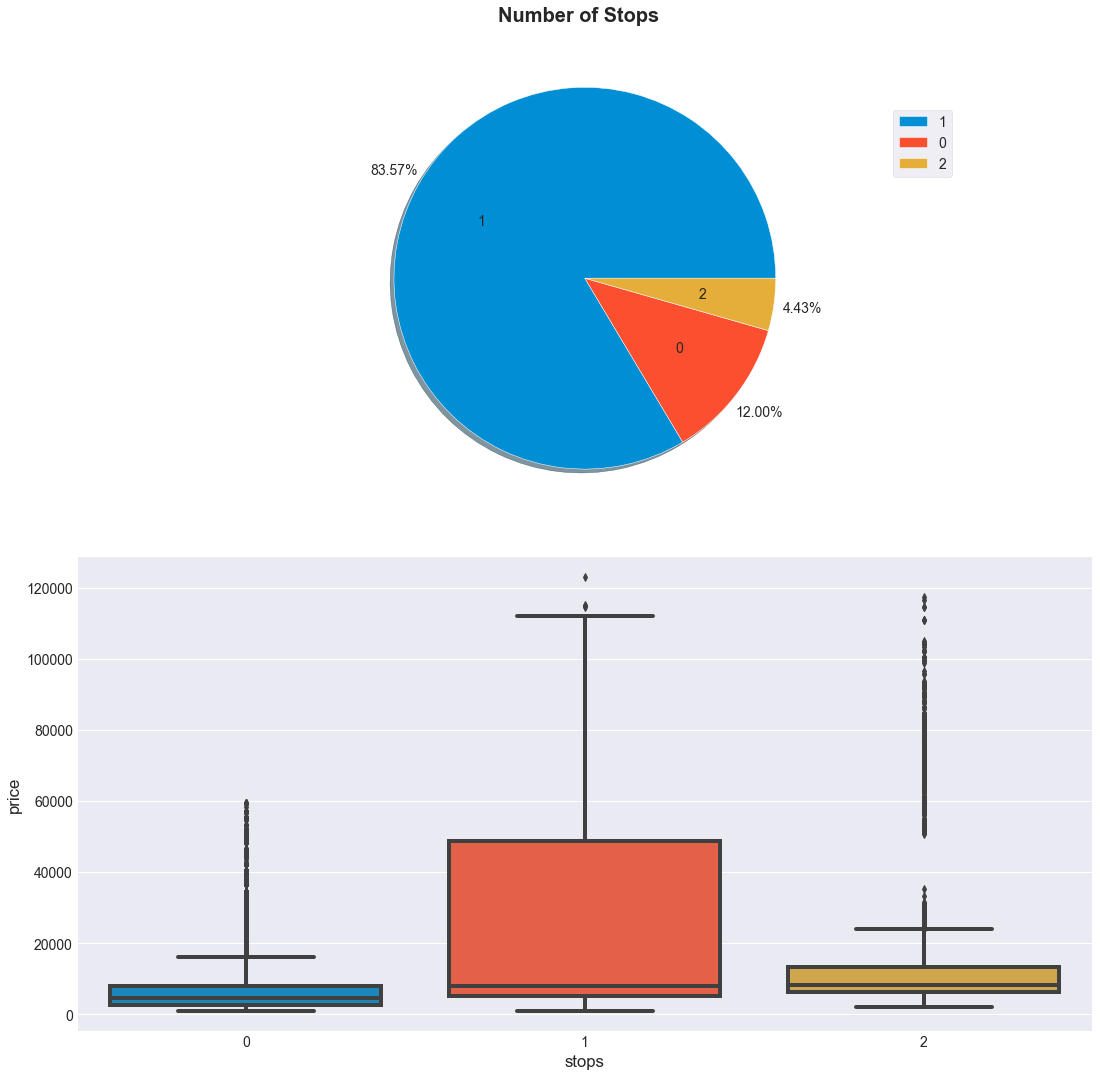

In [60]:
pie_box_plot('stops', 'Number of Stops')

In [20]:
clean_stops_group = clean_created_df.groupby(['from', 'to', 'stops_str']).count()['ch_code']
clean_stops_group

from       to         stops_str
Bangalore  Chennai    0              480
                      1             5427
                      2              503
           Delhi      0             2211
                      1            11329
                                   ...  
Mumbai     Hyderabad  1             9369
                      2              335
           Kolkata    0              933
                      1            10921
                      2              748
Name: ch_code, Length: 90, dtype: int64

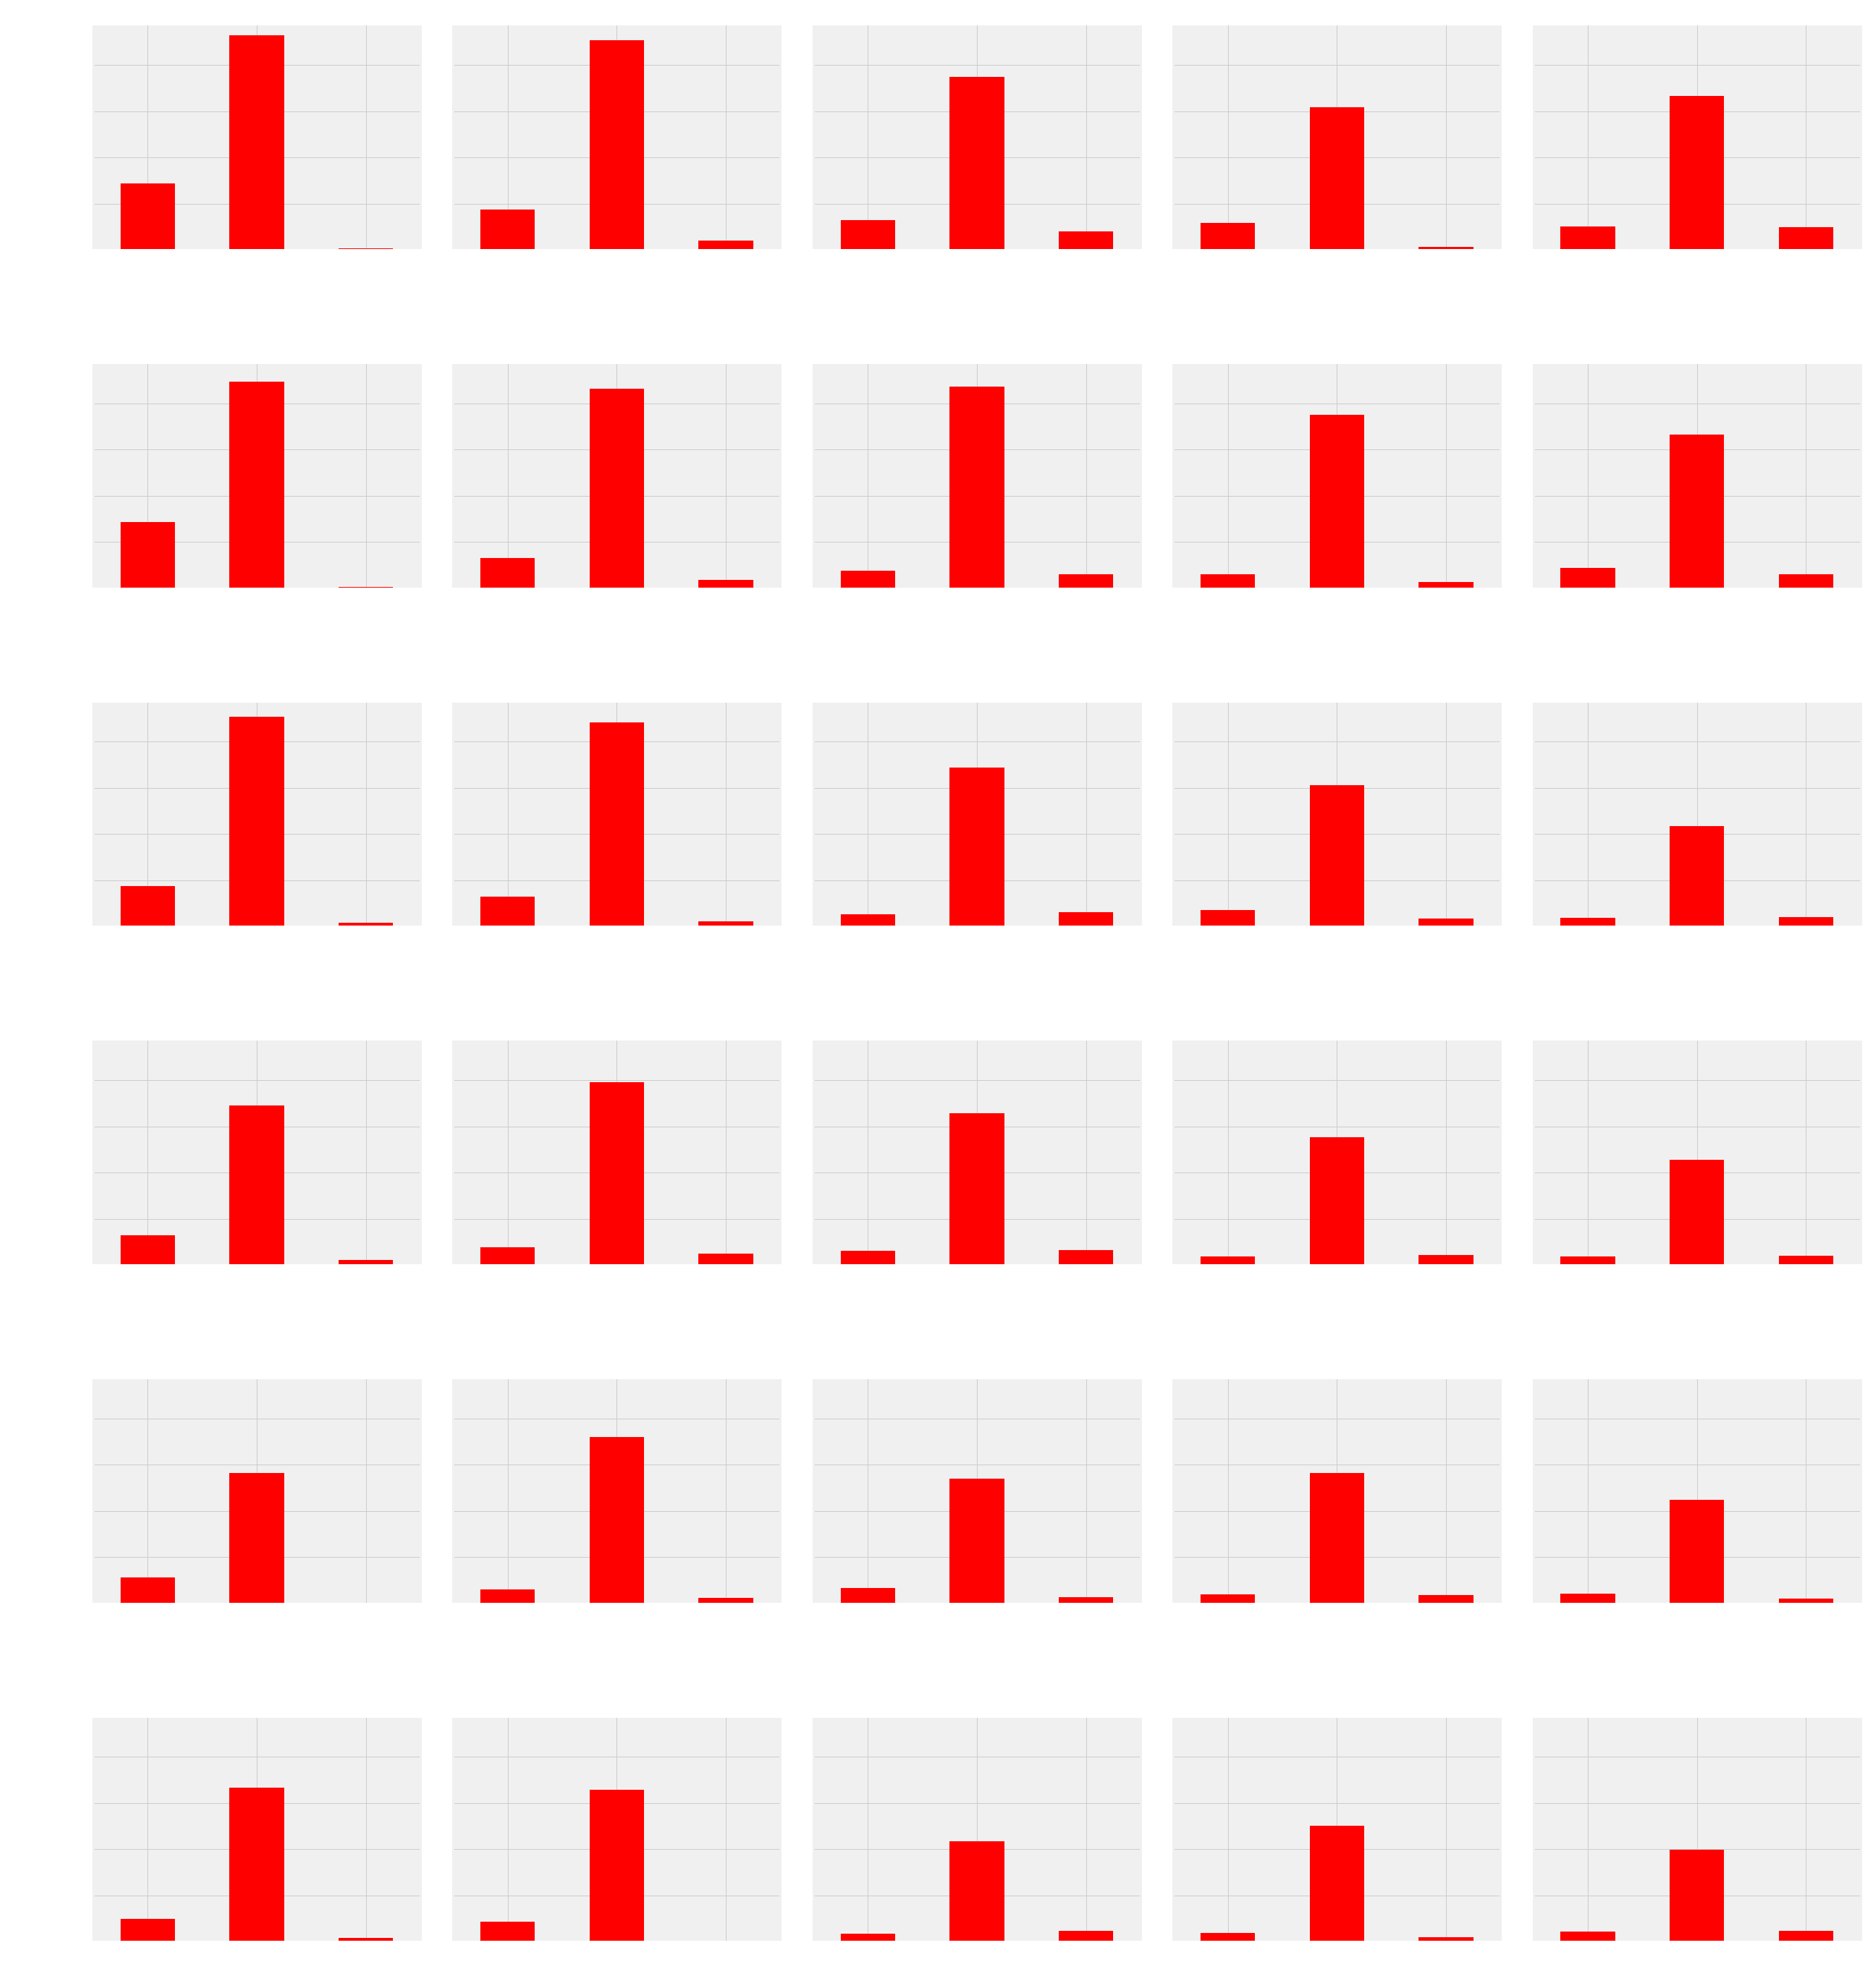

In [31]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 28}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(40, 50), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=0.5)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue

        ax = axes[a_row][a_col]
        clean_stops_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=28)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=28)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1

    a_row += 1
    a_col = 0


1 seems to be very common

## Stops based on airlines

In [4]:
clean_created_df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [51]:
clean_airline_group = clean_created_df.groupby(['airline', 'stops']).count()['ch_code']
clean_airline_group

airline    stops
Air India  0          6409
           1         71006
           2          3479
AirAsia    0          2434
           1         11418
           2          2246
GO FIRST   0          3223
           1         19547
           2           407
Indigo     0         11216
           1         31166
           2           738
SpiceJet   0          2462
           1          6549
StarAir    0            40
           1            21
Trujet     1            41
Vistara    0         10260
           1        111181
           2          6418
Name: ch_code, dtype: int64

In [49]:
clean_airline_group['SpiceJet'][2] = 0
    
clean_airline_group['StarAir'][2] = 0

clean_airline_group['Trujet'][0] = 0
clean_airline_group['Trujet'][2] = 0

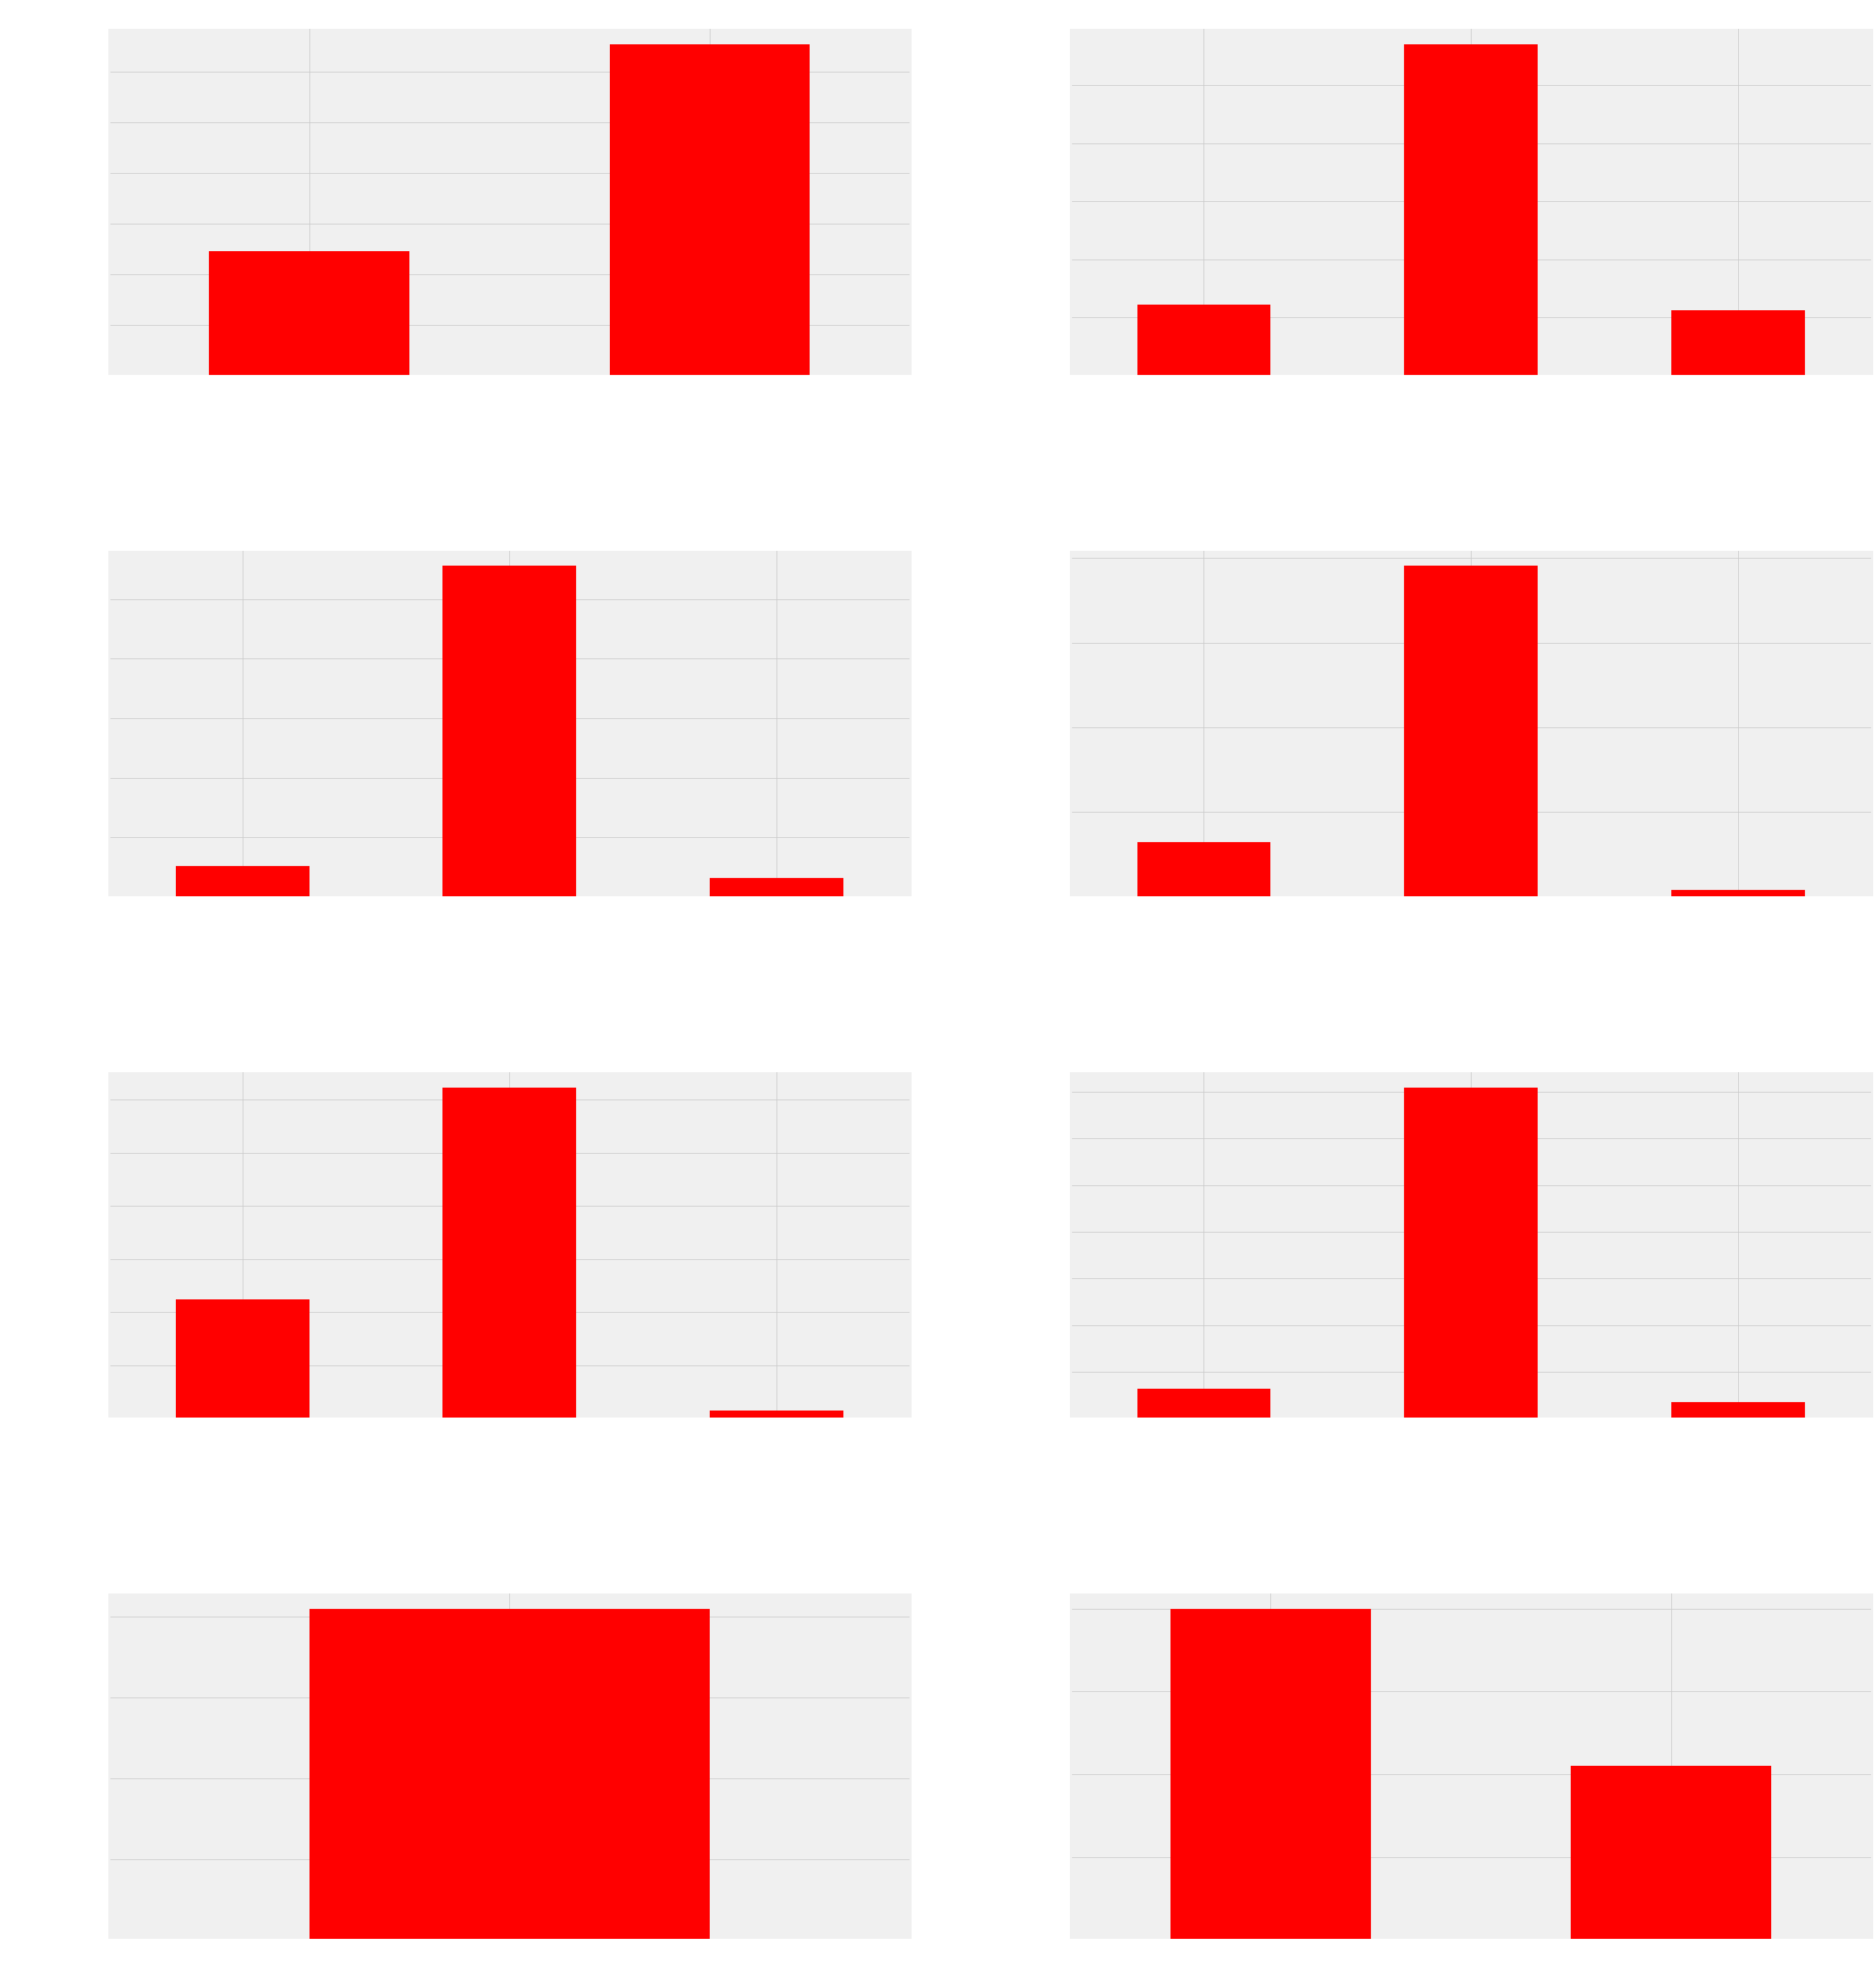

In [50]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 28}
mp.rc('font', **font)

nrows, ncols = 4, 2
airline = clean_created_df['airline'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(40, 50))
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.2, hspace=0.5)

ctr = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]
        clean_airline_group[airline[ctr]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(airline[ctr], fontstyle='italic', fontsize=34)
        ax.set_ylabel("Count", fontstyle='italic', fontsize=34)
        ax.set_xlabel("Number of Stops", fontstyle='italic', fontsize=34)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        ctr += 1


### Price distributions based on airlines, to and from locs, arrival and departure time encoding

In [4]:
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0


[Solution by Janitha Navratna](https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo)

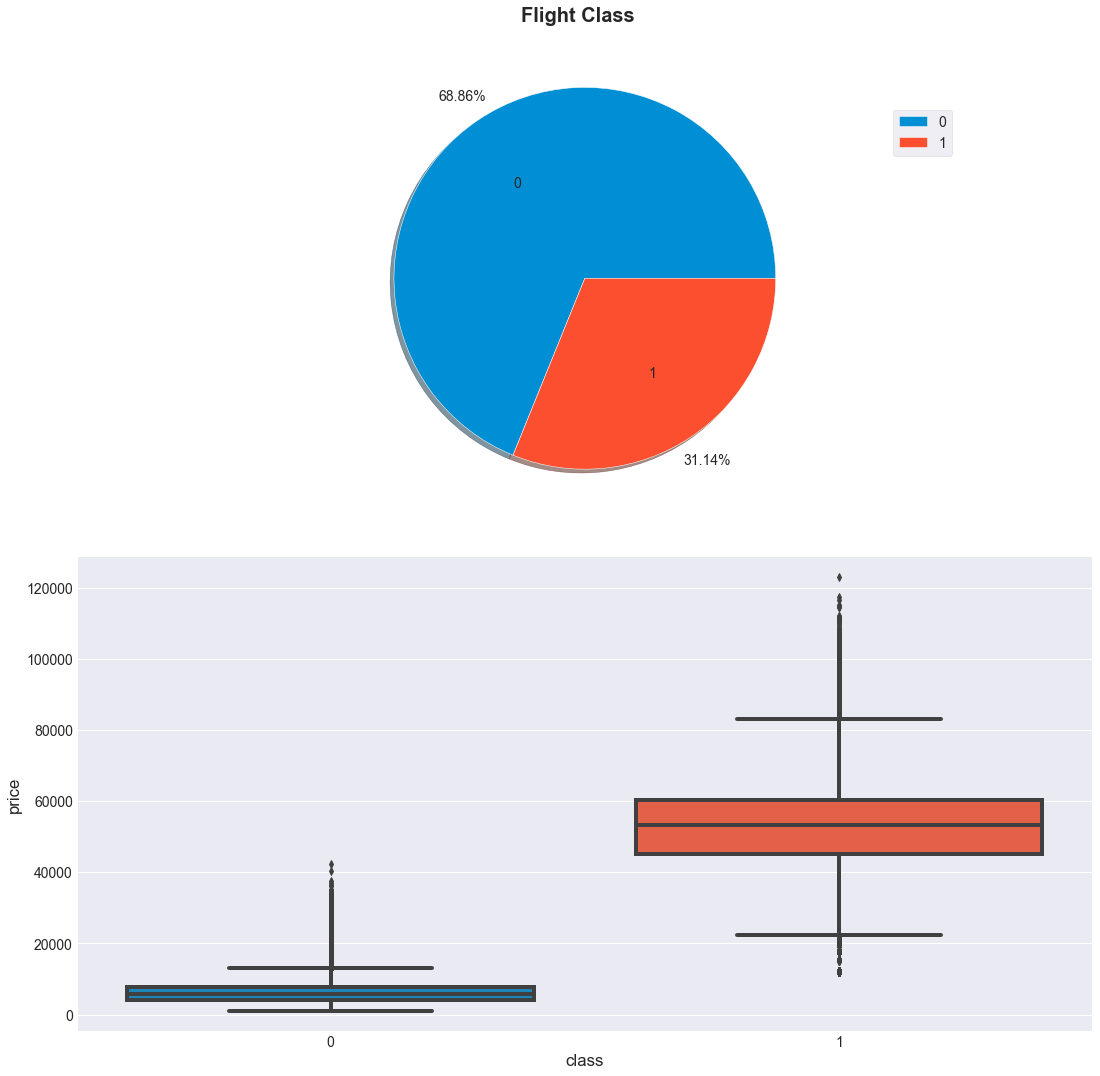

In [62]:
pie_box_plot('class', 'Flight Class')

In [24]:
clean_created_df.groupby(['airline', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

Min Price  Avg Price  Median Price  Max Price
airline   class                                               
Air India 0           1526     7314.0        6082.0      42349
          1          12000    47131.0       49613.0      90970
AirAsia   0           1105     4091.0        3276.0      31917
GO FIRST  0           1105     5652.0        5336.0      32803
Indigo    0           1105     5324.0        4453.0      31952
SpiceJet  0           1106     6179.0        5654.0      34158
StarAir   0           2000     4933.0        4337.0      17482
Trujet    0           3124     3245.0        3196.0       4844
Vistara   0           1714     7807.0        6461.0      37646
          1          17604    55477.0       56588.0     123071

In [25]:
clean_created_df.groupby(['from', 'to', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

Min Price  Avg Price  Median Price  Max Price
from      to        class                                               
Bangalore Chennai   0           1603     7106.0        6161.0      28174
                    1          12136    52437.0       49992.0      90720
          Delhi     0           2723     6125.0        4500.0      34158
                    1          32923    48144.0       50361.0     111883
          Hyderabad 0           1694     6356.0        5782.0      27610
                    1          12000    50396.0       56476.0      83239
          Kolkata   0           3026     7375.0        6271.0      29382
                    1          25000    58855.0       60508.0     105168
          Mumbai    0           2150     6381.0        6191.0      40354
                    1          20760    58025.0       56058.0     103819
Chennai   Bangalore 0           1443     7175.0        6161.0      36911
                    1          12000    53113.0       58970.0     107597
          Delhi     0           2051     6076.0        5100.0      34968
                    1          27792    52443.0       57920.0     103683
          Hyderabad 0           1105     5961.0        4714.0      26148
                    1          15000    51560.0       51345.0      92752
          Kolkata   0           2359     7547.0        5937.0      42349
                    1          20000    57079.0       55377.0     104624
          Mumbai    0           1830     6529.0        5037.0      37646
                    1          23424    56224.0       56273.0     114704
Delhi     Bangalore 0           3090     6176.0        4500.0      31917
                    1          32859    48576.0       49177.0      85353
          Chennai   0           1998     6102.0        4979.0      35145
                    1          27864    52032.0       52392.0     104466
          Hyderabad 0           2022     6031.0        5761.0      30760
                    1          23944    44457.0       46097.0     114507
          Kolkata   0           2480     7046.0        5955.0      32999
                    1          27976    56240.0       57405.0     117307
          Mumbai    0           2281     6060.0        5284.0      31260
                    1          22152    44364.0       42312.0      95657
Hyderabad Bangalore 0           1755     6209.0        5441.0      32751
                    1          12114    50358.0       56590.0      97767
          Chennai   0           1543     6050.0        4674.0      29128
                    1          15250    51132.0       51595.0      95208
          Delhi     0           2200     6072.0        5823.0      30211
                    1          24122    44251.0       47395.0      86203
          Kolkata   0           2056     6882.0        5960.0      33853
                    1          20000    53729.0       51819.0      97381
          Mumbai    0           2250     5966.0        4660.0      32803
                    1          17738    52184.0       52715.0     115211
Kolkata   Bangalore 0           3465     7472.0        6489.0      31899
                    1          25470    58681.0       60978.0     105638
          Chennai   0           2966     8012.0        6489.0      31479
                    1          20606    56503.0       55983.0      95183
          Delhi     0           2994     7161.0        6461.0      34944
                    1          28510    55047.0       53743.0     123071
          Hyderabad 0           2436     7489.0        6488.0      25494
                    1          20356    54732.0       52175.0     114705
          Mumbai    0           3379     7406.0        6067.0      31112
                    1          31838    57423.0       58111.0     110936
Mumbai    Bangalore 0           2074     6433.0        6319.0      34188
                    1          20684    57971.0       54608.0     114523
          Chennai   0           1890     6421.0        4732.0      33401
            

For almost all the cases the max price of economy is greater than the minimum price of business class.


In [39]:
clean_price_gb_dep_time = clean_created_df.groupby(['dep_time_enc', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

clean_price_gb_dep_time

Min Price  Avg Price  Median Price  Max Price
dep_time_enc  class                                               
Afternoon     0           1105     6176.0        5293.0      40354
              1          12000    50834.0       51819.0     111437
Early Morning 0           1105     6624.0        5766.0      36911
              1          12000    52334.0       53645.0     117307
Evening       0           1105     6508.0        5761.0      42349
              1          15000    53551.0       54608.0     116562
Late Night    0           2050     5277.0        4500.0      14526
              1          25000    47472.0       52586.0      56058
Morning       0           1105     7088.0        6067.0      37646
              1          12114    52924.0       53164.0     123071
Night         0           1105     6161.0        5441.0      33853
              1          15000    52281.0       53164.0     115211
Ungodly Hour  0           1543     5278.0        4500.0      31799
              1          27976    42159.0       39859.0      59033

In [40]:
print(clean_price_gb_dep_time.loc['Late Night'])
print(clean_price_gb_dep_time.loc['Ungodly Hour'])
print(clean_price_gb_dep_time.loc['Early Morning'])
print(clean_price_gb_dep_time.loc['Morning'])
print(clean_price_gb_dep_time.loc['Evening'])
print(clean_price_gb_dep_time.loc['Night'])

       Min Price  Avg Price  Median Price  Max Price
class                                               
0           2050     5277.0        4500.0      14526
1          25000    47472.0       52586.0      56058
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1543     5278.0        4500.0      31799
1          27976    42159.0       39859.0      59033
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6624.0        5766.0      36911
1          12000    52334.0       53645.0     117307
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     7088.0        6067.0      37646
1          12114    52924.0       53164.0     123071
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6508.0        5761.0     

* Starting from **Early Night** period the prices keep on increasing till **Evening** period.
* **Evening** and **Night** period have the highest max prices.

In [36]:
clean_price_gb_arr_time = clean_created_df.groupby(['arr_time_enc', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])
clean_price_gb_arr_time

Min Price  Avg Price  Median Price  Max Price
arr_time_enc  class                                               
Afternoon     0           1105     6766.0        5894.0      40354
              1          12000    51122.0       51817.0     117307
Early Morning 0           1105     5312.0        4896.0      35145
              1          12000    47504.0       45257.0     106416
Evening       0           1105     7146.0        6109.0      42349
              1          20606    54116.0       54777.0     114705
Late Night    0           1105     4678.0        3957.0      23945
              1          25470    48931.0       52522.0      63822
Morning       0           1105     6410.0        5655.0      36333
              1          12000    51536.0       52287.0     111964
Night         0           1105     6724.0        5881.0      37646
              1          15000    53484.0       53937.0     123071
Ungodly Hour  0           2057     4582.0        4205.0      23945
              1          29610    42452.0       47205.0      55655

In [33]:
temp.columns

Index(['Min Price', 'Avg Price', 'Median Price', 'Max Price'], dtype='object')

In [37]:
print(clean_price_gb_arr_time.loc['Late Night'])
print(clean_price_gb_arr_time.loc['Ungodly Hour'])
print(clean_price_gb_arr_time.loc['Early Morning'])
print(clean_price_gb_arr_time.loc['Morning'])
print(clean_price_gb_arr_time.loc['Evening'])
print(clean_price_gb_arr_time.loc['Night'])

       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     4678.0        3957.0      23945
1          25470    48931.0       52522.0      63822
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           2057     4582.0        4205.0      23945
1          29610    42452.0       47205.0      55655
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     5312.0        4896.0      35145
1          12000    47504.0       45257.0     106416
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6410.0        5655.0      36333
1          12000    51536.0       52287.0     111964
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     7146.0        6109.0     

* Starting from **Early Night** period the prices keep on increasing till **Evening** period.
* **Evening** period has the highest max price.

Time taken based on airlines, to and from locs

In [38]:
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0


In [4]:
def time_to_minutes(x):
    x = x.split(' ')
    h = x[0][0: x[0].index('h')]

    if '.' in h:
        h = int(float(Decimal(h)))
    else:
        h = int(h)
    
    m = x[1][0: x[1].index('m')]
    if m != "":
        m = int(m)
    else:
        m = 0
    return h * 60 + m

In [5]:
clean_created_df["time_taken_in_minutes"] = clean_created_df["time_taken"].apply(time_to_minutes)
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140


In [6]:
print("Pearson")
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 1]["price"], method="pearson"))
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 0]["price"], method="pearson"))

print()
print("Spearman")
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 1]["price"], method="spearman"))
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 0]["price"], method="spearman"))

Pearson
0.24272886308634062
0.28862391775390067

Spearman
0.16478981987906013
0.3582301563612107


There doesn't seem to be much significant correlation between the **time taken in minutes** for the journey to the **price of the journey**.

In [7]:
clean_created_df.corr().style.background_gradient(cmap='coolwarm')

,Unnamed: 0,num_code,price,class,stops,time_taken_in_minutes
Unnamed: 0,1.000000,0.112364,-0.410561,-0.451927,0.068997,0.008193
num_code,0.112364,1.000000,-0.212865,-0.217168,-0.062173,-0.133754
price,-0.410561,-0.212865,1.000000,0.937868,0.119798,0.204472
class,-0.451927,-0.217168,0.937868,1.000000,0.001195,0.138956
stops,0.068997,-0.062173,0.119798,0.001195,1.000000,0.468137
time_taken_in_minutes,0.008193,-0.133754,0.204472,0.138956,0.468137,1.000000


Except for classes other attributes didn't seem to have a significant impact on the prices of the flights.

### Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding

### Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible)

In [8]:
clean_created_df['date_time'] = pd.to_datetime(clean_created_df['date'], format='%d-%m-%Y')
clean_created_df['month'] = pd.DatetimeIndex(clean_created_df['date_time']).month
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2


In [9]:
clean_created_df['year'] = pd.DatetimeIndex(clean_created_df['date_time']).year
clean_created_df['year'].value_counts()

2022    300261
Name: year, dtype: int64

There are only months of **February** and **March** and that too from the **year 2022** only and thus there wouldn't be much changes in the flight prices in the time span of **2 months**.

Thus **not analysing** this piece of information as of now.

In [10]:
write_csv(new_csv, clean_created_df)

In [63]:
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,...,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,...,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,...,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,...,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,...,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,...,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022


In [75]:
clean_created_df['time_taken_in_minutes'].describe()

count    300261.000000
mean        733.065416
std         431.576241
min          50.000000
25%         405.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: time_taken_in_minutes, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_9584\1640171358.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax[0].set_xticklabels(np.arange(0, 5000, 500), rotation=90)


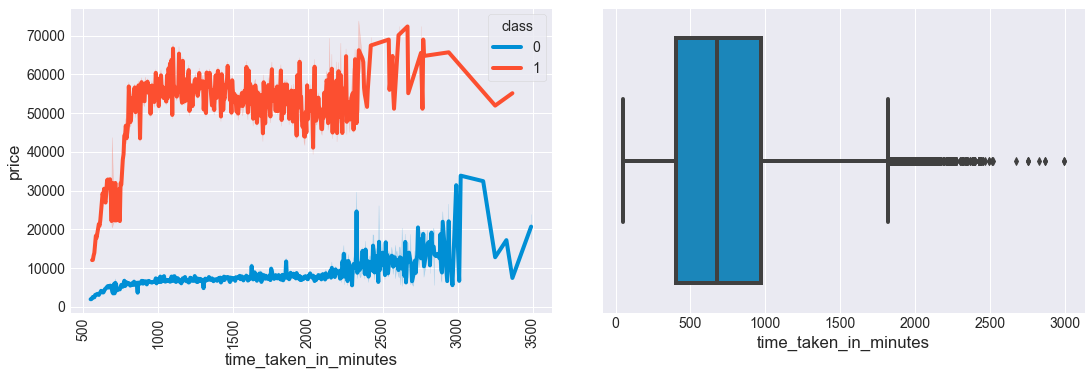

In [72]:
fig, ax = mp.subplots(1, 2, figsize=(15, 5))
mp.tight_layout()
# Left ax
sns.lineplot(x='time_taken_in_minutes', y='price', data=clean_created_df, ax=ax[0], hue='class')
_ = ax[0].set_xticklabels(np.arange(0, 5000, 500), rotation=90)

# Right AX
sns.boxplot(data=clean_created_df, x='time_taken_in_minutes', ax=ax[1])
mp.show()

Days Left

In [76]:
p1 = "Clean_Dataset.csv"
p2 = "business.csv"
p3 = "economy.csv"


cln = pd.read_csv(p1)
bus = pd.read_csv(p2)
eco = pd.read_csv(p3)

In [77]:
cln.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [78]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [79]:
eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
dd = pd.DataFrame(df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
dd1 = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))